# Agenda
* Numpy
* Pandas
* Lab


# Introduction


## Create a new notebook for your code-along:

From our submission directory, type:
    
    jupyter notebook

From the IPython Dashboard, open a new notebook.
Change the title to: "Numpy and Pandas"

# Introduction to Numpy

* Overview
* ndarray
* Indexing and Slicing

More info: [http://wiki.scipy.org/Tentative_NumPy_Tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial)


## Numpy Overview

* Why Python for Data? Numpy brings *decades* of C math into Python!
* Numpy provides a wrapper for extensive C/C++/Fortran codebases, used for data analysis functionality
* NDAarray allows easy vectorized math and broadcasting (i.e. functions for vector elements of different shapes)

In [79]:
from numpy import * #Load all the numpy packages

In [80]:
zeros?

### A Note About "import as" & 'Name spaces'

    import * 
This loads all submodules. Note: this is a waste of memory when incorporated into deployed code. 
We'll use it here by example - it's fine to use for learning purposes and legibility.

As we'll see later, the proper convention is to use:

    import numpy as np
    
And then to specifically call needed methods:

![](http://bit.do/cBuMz)

### Creating ndarrays

An array object represents a multidimensional, homogeneous array of fixed-size items. 

In [81]:
# A simple 1-dimensional array:
a = zeros((3))
print(a)
a.shape

[ 0.  0.  0.]


(3,)

In [82]:
b = ones((2,3))
print(b.shape)
print(b)

(2, 3)
[[ 1.  1.  1.]
 [ 1.  1.  1.]]


In [83]:
# Note the way each array is printed:
c = random.randint(1,10,(2,3,4))
print(c.shape)
c

(2, 3, 4)


array([[[7, 5, 1, 7],
        [1, 7, 3, 2],
        [6, 7, 3, 4]],

       [[9, 9, 4, 2],
        [6, 8, 1, 5],
        [1, 9, 4, 6]]])

In [84]:
demo = arange(24)

In [85]:
arange(0, 1, 0.1)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [86]:
demo

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [87]:
demo.shape

(24,)

In [88]:
demo_2d = demo.reshape(-1, 2)
demo_2d

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19],
       [20, 21],
       [22, 23]])

In [89]:
demo_2d.shape

(12, 2)

In [90]:
demo_3d = demo_2d.reshape(-1, 2, 3)
demo_3d.shape


(4, 2, 3)

In [91]:
demo_3d

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23]]])

### Arithmetic in arrays is element wise

In [92]:
a = array( [20,30,40,50])
b = arange( 4 )
print a
print b

[20 30 40 50]
[0 1 2 3]


In [93]:
c = a-b
c

array([20, 29, 38, 47])

In [94]:
b**2

array([0, 1, 4, 9])

## Indexing, Slicing and Iterating

In [95]:
# one-dimensional arrays work like lists:
a = arange(10)**2

In [96]:
a

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [97]:
a[:8]

array([ 0,  1,  4,  9, 16, 25, 36, 49])

### Multidimensional arrays use (row,column) tuples counting from 0

In [98]:
b = random.randint(1,100,(4,4))

In [99]:
b

array([[66, 49, 74, 30],
       [35, 85, 94, 98],
       [30, 75, 58, 61],
       [46, 97, 44, 95]])

In [100]:
# Guess the output
b[2,3]

61

In [101]:
b[0,0]

66

In [102]:
b[0:3,1]

array([49, 85, 75])

In [103]:
b[:,1]

array([49, 85, 75, 97])

In [104]:
b[1:3,:]

array([[35, 85, 94, 98],
       [30, 75, 58, 61]])

# Introduction to Pandas

* Object Creation
* Viewing data
* Selection
* Missing data
* Grouping
* Reshaping
* Time series
* Plotting
* i/o
 

_pandas.pydata.org_

## Pandas Overview

_Source: [pandas.pydata.org](http://pandas.pydata.org/pandas-docs/stable/10min.html)_

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [106]:
pd.DataFrame(demo_2d) # note row & column index are auto-generated

,0,1
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9
5,10,11
6,12,13
7,14,15
8,16,17
9,18,19


In [107]:
# Creating a DateTime index
dates = pd.date_range('20140101',periods=6)
dates

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [108]:
list('ABCD')

['A', 'B', 'C', 'D']

In [109]:
df = pd.DataFrame(np.random.randn(6,4),
                  index=dates,
                  columns=list('ABCD'))
df

,A,B,C,D
2014-01-01,-0.057885,-0.002677,0.062784,-0.496724
2014-01-02,1.784018,-0.059849,0.305489,-1.134783
2014-01-03,-2.371349,0.620562,-0.366361,-0.262445
2014-01-04,-0.978137,0.503017,0.955091,-0.423483
2014-01-05,-0.993031,-0.862003,-0.836545,-1.420787
2014-01-06,-1.470173,0.530449,0.460020,0.073427


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2014-01-01 to 2014-01-06
Freq: D
Data columns (total 4 columns):
A    6 non-null float64
B    6 non-null float64
C    6 non-null float64
D    6 non-null float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [111]:
# Index, columns, underlying numpy data
df

,A,B,C,D
2014-01-01,-0.057885,-0.002677,0.062784,-0.496724
2014-01-02,1.784018,-0.059849,0.305489,-1.134783
2014-01-03,-2.371349,0.620562,-0.366361,-0.262445
2014-01-04,-0.978137,0.503017,0.955091,-0.423483
2014-01-05,-0.993031,-0.862003,-0.836545,-1.420787
2014-01-06,-1.470173,0.530449,0.460020,0.073427


In [112]:
df.transpose()

,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-04 00:00:00,2014-01-05 00:00:00,2014-01-06 00:00:00
A,-0.057885,1.784018,-2.371349,-0.978137,-0.993031,-1.470173
B,-0.002677,-0.059849,0.620562,0.503017,-0.862003,0.530449
C,0.062784,0.305489,-0.366361,0.955091,-0.836545,0.460020
D,-0.496724,-1.134783,-0.262445,-0.423483,-1.420787,0.073427


In [113]:
df.values

array([[-0.05788466, -0.00267663,  0.06278433, -0.49672443],
       [ 1.78401772, -0.05984892,  0.30548898, -1.13478304],
       [-2.37134898,  0.6205621 , -0.36636087, -0.26244467],
       [-0.97813717,  0.50301656,  0.95509051, -0.42348261],
       [-0.99303117, -0.86200303, -0.8365448 , -1.42078681],
       [-1.47017333,  0.53044915,  0.46002047,  0.07342735]])

### Let's create a new example

In [114]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
      'D' : np.array([3] * 4,dtype='int32'),
      'E' : 'foo' })


df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,3,foo
1,1.0,2013-01-02,1.0,3,foo
2,1.0,2013-01-02,1.0,3,foo
3,1.0,2013-01-02,1.0,3,foo


In [115]:
# With specific dtypes
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
dtype: object

#### Viewing Data

In [116]:
df.head(3)

,A,B,C,D
2014-01-01,-0.057885,-0.002677,0.062784,-0.496724
2014-01-02,1.784018,-0.059849,0.305489,-1.134783
2014-01-03,-2.371349,0.620562,-0.366361,-0.262445


In [117]:
df.tail(2)

,A,B,C,D
2014-01-05,-0.993031,-0.862003,-0.836545,-1.420787
2014-01-06,-1.470173,0.530449,0.460020,0.073427


In [118]:
df.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [119]:
df.columns # Note: columns are also of type 'Index'!

Index([u'A', u'B', u'C', u'D'], dtype='object')

#### Quick summary statistics

In [120]:
percentiles = np.arange(0, 1, 0.1)
df.describe(percentiles=list(percentiles))

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.681093,0.121583,0.096746,-0.610799
std,1.423398,0.561684,0.632290,0.560046
min,-2.371349,-0.862003,-0.836545,-1.420787
0%,-2.371349,-0.862003,-0.836545,-1.420787
10%,-1.920761,-0.460926,-0.601453,-1.277785
20%,-1.470173,-0.059849,-0.366361,-1.134783
30.0%,-1.231602,-0.031263,-0.151788,-0.815754
40%,-0.993031,-0.002677,0.062784,-0.496724
50%,-0.985584,0.250170,0.184137,-0.460104


In [121]:
df.sort_values(by=['B', 'D'], ascending=False)

,A,B,C,D
2014-01-03,-2.371349,0.620562,-0.366361,-0.262445
2014-01-06,-1.470173,0.530449,0.460020,0.073427
2014-01-04,-0.978137,0.503017,0.955091,-0.423483
2014-01-01,-0.057885,-0.002677,0.062784,-0.496724
2014-01-02,1.784018,-0.059849,0.305489,-1.134783
2014-01-05,-0.993031,-0.862003,-0.836545,-1.420787


### Selection

In [122]:
type(df['A'])

pandas.core.series.Series

In [123]:
type(df[['A']]) # Careful! Get different type depending on selection

pandas.core.frame.DataFrame

In [124]:
df[['A']].shape

(6, 1)

In [125]:
df[0:3]

,A,B,C,D
2014-01-01,-0.057885,-0.002677,0.062784,-0.496724
2014-01-02,1.784018,-0.059849,0.305489,-1.134783
2014-01-03,-2.371349,0.620562,-0.366361,-0.262445


In [126]:
# By label
dates[2]

Timestamp('2014-01-03 00:00:00', freq='D')

In [127]:
df.loc[dates[2]] # Select the first row, get back a pd.Series

A   -2.371349
B    0.620562
C   -0.366361
D   -0.262445
Name: 2014-01-03 00:00:00, dtype: float64

In [128]:
# multi-axis by label
df.loc[:,['A','D']]

,A,D
2014-01-01,-0.057885,-0.496724
2014-01-02,1.784018,-1.134783
2014-01-03,-2.371349,-0.262445
2014-01-04,-0.978137,-0.423483
2014-01-05,-0.993031,-1.420787
2014-01-06,-1.470173,0.073427


In [129]:
# Date Range
df.loc['20140102':'20140104',['B', 'D']]

,B,D
2014-01-02,-0.059849,-1.134783
2014-01-03,0.620562,-0.262445
2014-01-04,0.503017,-0.423483


In [130]:
# Fast access to scalar
df.at[dates[1],'B']

-0.059848924886500808

In [131]:
# iloc provides integer locations similar to np style
df.iloc[3:]

,A,B,C,D
2014-01-04,-0.978137,0.503017,0.955091,-0.423483
2014-01-05,-0.993031,-0.862003,-0.836545,-1.420787
2014-01-06,-1.470173,0.530449,0.460020,0.073427


### Boolean Indexing

In [137]:
df[(df.A > 0) & (df.B<0)] # Basically a 'where' operation

2014-01-01    False
2014-01-02     True
2014-01-03    False
2014-01-04    False
2014-01-05    False
2014-01-06    False
Freq: D, Name: A, dtype: bool

### Setting

In [83]:
df_posA = df.copy() # Without "copy" it would act on the dataset
df_posA[df_posA.A < 0] = 4 # Converting negative values in 'A' to positive

In [84]:
df_posA

,A,B,C,D
2014-01-01,0.572099,0.595710,0.206655,0.112041
2014-01-02,1.033703,-0.258843,0.805425,-0.856877
2014-01-03,0.734361,-0.462281,0.829300,0.369035
2014-01-04,4.000000,4.000000,4.000000,4.000000
2014-01-05,2.238950,-0.465874,0.111973,0.537845
2014-01-06,1.519169,-1.849505,0.506451,0.082213


In [85]:
#Setting new column  - auto aligns data by index
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20140102',periods=6))

In [86]:
s1

2014-01-02    1
2014-01-03    2
2014-01-04    3
2014-01-05    4
2014-01-06    5
2014-01-07    6
Freq: D, dtype: int64

In [87]:
df['F'] = s1

In [88]:
df # Note missing value in first row for column 'F'!

,A,B,C,D,F
2014-01-01,0.572099,0.595710,0.206655,0.112041,NaN
2014-01-02,1.033703,-0.258843,0.805425,-0.856877,1.0
2014-01-03,0.734361,-0.462281,0.829300,0.369035,2.0
2014-01-04,-0.677368,-2.005667,-1.579533,1.265836,3.0
2014-01-05,2.238950,-0.465874,0.111973,0.537845,4.0
2014-01-06,1.519169,-1.849505,0.506451,0.082213,5.0


### Missing Data

In [89]:
# Add a column with missing data (on subset of df, just rows [0:4])
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])

In [90]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [91]:
df1

,A,B,C,D,F,E
2014-01-01,0.572099,0.595710,0.206655,0.112041,NaN,1.0
2014-01-02,1.033703,-0.258843,0.805425,-0.856877,1.0,1.0
2014-01-03,0.734361,-0.462281,0.829300,0.369035,2.0,NaN
2014-01-04,-0.677368,-2.005667,-1.579533,1.265836,3.0,NaN


In [ ]:
# find where values are null
pd.isnull(df1)

### Operations

In [92]:
df.describe()

,A,B,C,D,F
count,6.000000,6.000000,6.000000,6.000000,5.000000
mean,0.903486,-0.741077,0.146712,0.251682,3.000000
std,0.981530,1.000081,0.895987,0.693007,1.581139
min,-0.677368,-2.005667,-1.579533,-0.856877,1.000000
25%,0.612664,-1.503597,0.135643,0.089670,2.000000
50%,0.884032,-0.464077,0.356553,0.240538,3.000000
75%,1.397802,-0.309702,0.730681,0.495642,4.000000
max,2.238950,0.595710,0.829300,1.265836,5.000000


In [95]:
df.mean(axis=0) 

A    0.903486
B   -0.741077
C    0.146712
D    0.251682
F    3.000000
dtype: float64

In [94]:
df.mean(axis=1) # Operation on two different axes

2014-01-01    0.371626
2014-01-02    0.344682
2014-01-03    0.694083
2014-01-04    0.000654
2014-01-05    1.284579
2014-01-06    1.051665
Freq: D, dtype: float64

### Applying functions

In [59]:
df

,A,B,C,D
2014-01-01,1.468063,0.149422,-2.024851,-0.162785
2014-01-02,-1.271291,-0.016593,-0.775333,0.171382
2014-01-03,1.217533,-1.796451,-1.022629,-0.651406
2014-01-04,-1.834336,0.781995,-0.096256,0.842988
2014-01-05,0.128810,-0.345935,-0.987706,0.667441
2014-01-06,0.378683,-0.200427,0.818421,0.227864


In [60]:
df.apply(np.cumsum)

,A,B,C,D
2014-01-01,1.468063,0.149422,-2.024851,-0.162785
2014-01-02,0.196772,0.132829,-2.800184,0.008597
2014-01-03,1.414305,-1.663622,-3.822813,-0.642809
2014-01-04,-0.420031,-0.881628,-3.919069,0.200179
2014-01-05,-0.291221,-1.227563,-4.906775,0.867620
2014-01-06,0.087462,-1.427990,-4.088354,1.095484


In [61]:
df.apply(lambda x: x.max() - x.min())

A    3.302399
B    2.578446
C    2.843272
D    1.494394
dtype: float64

In [62]:
# Built in string methods
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [64]:
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [63]:
s.str.

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge

In [ ]:
random.randn(10,4)

In [65]:
#Concatenating pandas objects together
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-1.202764,-0.096477,0.677274,2.203750
1,-0.996227,-0.382701,-0.356256,-1.783262
2,0.810428,1.004883,0.784538,0.242213
3,-0.585820,-0.007164,1.716793,-0.893775
4,0.009129,0.875914,-2.646957,0.798891
5,-0.249521,-0.702536,-0.908191,-1.383175
6,1.430167,0.009546,1.213494,-1.409108
7,-1.327235,-0.436561,-0.162113,-0.278544
8,1.947949,-0.565586,1.041494,0.260750
9,-0.896961,-0.667346,-1.688423,-1.156652


In [66]:
# Break it into pieces
piece_1 = df[:3]
piece_2 = df[3:7]
piece_3 = df[7:]
print(piece_1)
print(piece_2)
print(piece_3)

          0         1         2         3
0 -1.202764 -0.096477  0.677274  2.203750
1 -0.996227 -0.382701 -0.356256 -1.783262
2  0.810428  1.004883  0.784538  0.242213
          0         1         2         3
3 -0.585820 -0.007164  1.716793 -0.893775
4  0.009129  0.875914 -2.646957  0.798891
5 -0.249521 -0.702536 -0.908191 -1.383175
6  1.430167  0.009546  1.213494 -1.409108
          0         1         2         3
7 -1.327235 -0.436561 -0.162113 -0.278544
8  1.947949 -0.565586  1.041494  0.260750
9 -0.896961 -0.667346 -1.688423 -1.156652


In [67]:
pd.concat([piece_1, piece_2, piece_3])

,0,1,2,3
0,-1.202764,-0.096477,0.677274,2.203750
1,-0.996227,-0.382701,-0.356256,-1.783262
2,0.810428,1.004883,0.784538,0.242213
3,-0.585820,-0.007164,1.716793,-0.893775
4,0.009129,0.875914,-2.646957,0.798891
5,-0.249521,-0.702536,-0.908191,-1.383175
6,1.430167,0.009546,1.213494,-1.409108
7,-1.327235,-0.436561,-0.162113,-0.278544
8,1.947949,-0.565586,1.041494,0.260750
9,-0.896961,-0.667346,-1.688423,-1.156652


In [68]:
# Also can "Join" and "Append"
piece_1.append(piece_2)

,0,1,2,3
0,-1.202764,-0.096477,0.677274,2.203750
1,-0.996227,-0.382701,-0.356256,-1.783262
2,0.810428,1.004883,0.784538,0.242213
3,-0.585820,-0.007164,1.716793,-0.893775
4,0.009129,0.875914,-2.646957,0.798891
5,-0.249521,-0.702536,-0.908191,-1.383175
6,1.430167,0.009546,1.213494,-1.409108


In [ ]:
piece_1.T.join(piece_2.T)

### Grouping


In [69]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})

In [70]:
df

,A,B,C,D
0,foo,one,1.081594,0.341401
1,bar,one,-0.214158,1.106606
2,foo,two,1.259579,-0.650371
3,bar,three,1.627218,-1.142701
4,foo,two,0.979256,1.367776
5,bar,two,-0.754530,0.339264
6,foo,one,-0.493245,0.404205
7,foo,three,-0.365068,-0.366554


In [71]:
grouped_sum = df.groupby(['A','B']).sum()
grouped_sum

C         D
A   B                        
bar one   -0.214158  1.106606
    three  1.627218 -1.142701
    two   -0.754530  0.339264
foo one    0.588349  0.745606
    three -0.365068 -0.366554
    two    2.238834  0.717404

### Reshaping

In [ ]:
# You can also stack or unstack levels

In [72]:
unstacked = grouped_sum.unstack('B')
unstacked

C                             D                    
B         one     three       two       one     three       two
A                                                              
bar -0.214158  1.627218 -0.754530  1.106606 -1.142701  0.339264
foo  0.588349 -0.365068  2.238834  0.745606 -0.366554  0.717404

In [ ]:
# Pivot Tables
pd.pivot_table(df,values=['C','D'],index=['A'],columns=['B'])

### Time Series


In [138]:
import pandas as pd
import numpy as np

In [139]:
# 100 Seconds starting on January 1st
rng = pd.date_range('1/1/2014', periods=100, freq='S')

In [140]:
# Give each second a random value
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [141]:
ts


2014-01-01 00:00:00    135
2014-01-01 00:00:01    213
2014-01-01 00:00:02    327
2014-01-01 00:00:03    188
2014-01-01 00:00:04    157
2014-01-01 00:00:05    245
2014-01-01 00:00:06     71
2014-01-01 00:00:07    193
2014-01-01 00:00:08    183
2014-01-01 00:00:09    424
2014-01-01 00:00:10    346
2014-01-01 00:00:11     59
2014-01-01 00:00:12    382
2014-01-01 00:00:13    219
2014-01-01 00:00:14    481
2014-01-01 00:00:15    456
2014-01-01 00:00:16    380
2014-01-01 00:00:17     92
2014-01-01 00:00:18    380
2014-01-01 00:00:19    203
2014-01-01 00:00:20     66
2014-01-01 00:00:21    298
2014-01-01 00:00:22    378
2014-01-01 00:00:23    313
2014-01-01 00:00:24    175
2014-01-01 00:00:25     71
2014-01-01 00:00:26     92
2014-01-01 00:00:27     85
2014-01-01 00:00:28    479
2014-01-01 00:00:29    303
                      ... 
2014-01-01 00:01:10    167
2014-01-01 00:01:11    413
2014-01-01 00:01:12     22
2014-01-01 00:01:13    100
2014-01-01 00:01:14     36
2014-01-01 00:01:15    251
2

In [143]:
# Built in resampling
ts.resample('1Min').mean() # Resample secondly to 1Minutely

2014-01-01 00:00:00    246.300
2014-01-01 00:01:00    272.925
Freq: T, dtype: float64

In [ ]:
# Many additional time series features
ts.

### Plotting


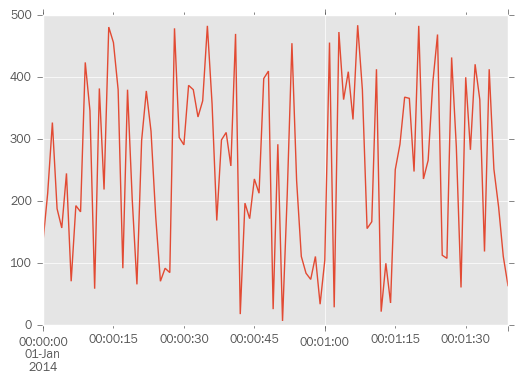

In [144]:
ts.plot(); # Note semicolon for 'cleaner' output

In [145]:
def randwalk(startdate,points):
    ts = pd.Series(np.random.randn(points), 
                   index=pd.date_range(startdate, periods=points))
    ts=ts.cumsum()
    ts.plot()
    return(ts)

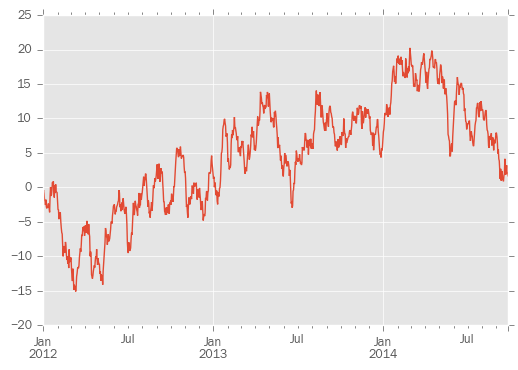

In [146]:
# Using pandas to make a simple random walker by repeatedly running:
a=randwalk('1/1/2012',1000)

In [ ]:
# Pandas plot function will print with labels as default

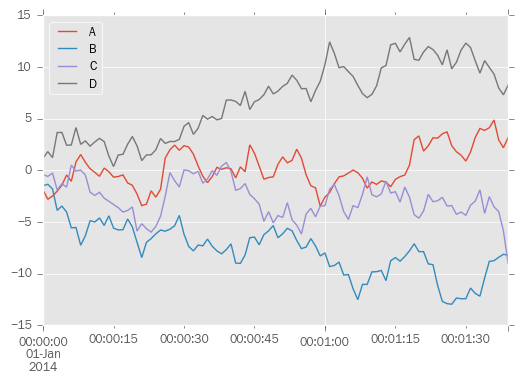

In [147]:
df = pd.DataFrame(np.random.randn(100, 4), 
                  index=ts.index,columns=['A', 'B', 'C', 'D'])
df.cumsum().plot();

### I/O
I/O is straightforward with, for example, pd.read_csv or df.to_csv

#### The benefits of open source:

Let's look under x's in plt modules

# Next Steps

**Recommended Resources**

Name | Description
--- | ---
[Official Pandas Tutorials](http://pandas.pydata.org/pandas-docs/stable/10min.html) | Wes & Company's selection of tutorials and lectures
[Julia Evans Pandas Cookbook](https://github.com/jvns/pandas-cookbook) | Great resource with examples from weather, bikes and 311 calls
[Learn Pandas Tutorials](https://bitbucket.org/hrojas/learn-pandas) | A great series of Pandas tutorials from Dave Rojas
[Research Computing Python Data PYNBs](https://github.com/ResearchComputing/Meetup-Fall-2013/tree/master/python) | A super awesome set of python notebooks from a meetup-based course exclusively devoted to pandas